# Phys 404, Spring 2021, Ryan Schauer, 03/28/21
## Homework #8:

Any mass can lead to a gravitational potential in 3-D (x-y-z) space
\begin{equation}
\nabla^2\Phi=4\pi G\rho
\end{equation}
    

We will set G=1 for this problem.  
Please solve the potential of a line mass 
(i.e. one zone at x=50, y=50 with nonzero density and all others with zero density) 
using SOR. Since the problem has symmetry in the Z direction:
\begin{equation}
\nabla^2\Phi=\frac{\partial^2\Phi}{\partial^2 x}+\frac{\partial^2\Phi}{\partial^2y}
\end{equation}


The domain is X from 0 to 100, Y from 0 to 100. $\Delta$x= $\Delta$y=1. (assume $\Phi=0$
at the boundary and $\rho_{50,50}$ is always 1)

Please verify that the potential has radial dependence close to 2*G*$\mu$*ln(r)+constant. 
Where $\mu$ is its mass per unit length and r is the distance to the line mass. 



### Jacobi method
You can discretize the elliptic equation
\begin{equation}
\nabla^2V=\rho
\end{equation}
into
\begin{equation}
\frac{1}{h^2}(V_{i+1,j}+V_{i-1,j}+V_{i,j+1}+V_{i,j-1}-4 V_{i,j})=\rho_{i,j}
\end{equation}
Then we can use neigboring grids to calculate $V_{i,j}$ with
\begin{equation}
du_{i,j}=\frac{1}{4}(V_{i+1,j}+V_{i-1,j}+V_{i,j+1}+V_{i,j-1})-\frac{h^2}{4}\rho_{i,j}-V_{i,j}
\end{equation}
\begin{equation}
V^*_{i,j}=V_{i,j}+du_{i,j}
\end{equation}

For this example, $\rho$ is zero within the domain, so
\begin{equation}
du_{i,j}=\frac{1}{4}(V_{i+1,j}+V_{i-1,j}+V_{i,j+1}+V_{i,j-1})-V_{i,j}
\end{equation}
\begin{equation}
V^*_{i,j}=V_{i,j}+du_{i,j}
\end{equation}

### SOR

The same as Gauss-Seidal, except with a $\omega$ parameter for correction
\begin{equation}
du_{i,j}=\frac{1}{4}(V_{i+1,j}+V^*_{i-1,j}+V_{i,j+1}+V^*_{i,j-1})-V_{i,j}
\end{equation}
\begin{equation}
V^*_{i,j}=V_{i,j}+\Omega du_{i,j}
\end{equation}
$\Omega$ is between 1 and 2

Initializing
0
3.141592653589793
1.413716694115407
1.2723450247038663
0.8588328916751098
0.7729496025075988
0.579712201880699
0.5217409816926292
0.4108710230829455
0.36978392077465094
0.2995249758274673
10
0.2695724782447206
0.22239729455189447
0.20015756509670501
0.1672745365451035
0.15054708289059315
0.12702410118893798
0.11432169107004418
0.09717343740953756
0.0874560936685838
0.07477496008663914
20
0.06729746407797522
0.05781463959426054
0.052033175634834485
0.044878613985044745
0.04039075258654027
0.03495353589219831
0.03145818230297848
0.027301208212942036
0.024571087391647834
0.021376846030733615
30
0.020068592452584078
0.019258681179501025
0.01865694154520381
0.017964943823147284
0.017444404750322162
0.01684387695428491
0.01638841087205667
0.015870160542547307
0.01545839784465275
0.015005738080432707
40
0.01463174866237349
0.014233814952342438
0.013891277259362678
0.01353825317000501
0.01322362241687225
0.012907131305265995
0.01261819059492586
0.012332067938648716
0.01206644032

<ipython-input-1-dd1b13619b18>:53: RuntimeWarning: divide by zero encountered in log
  return -2*mu*log(r)+2.5*pi


<IPython.core.display.Javascript object>


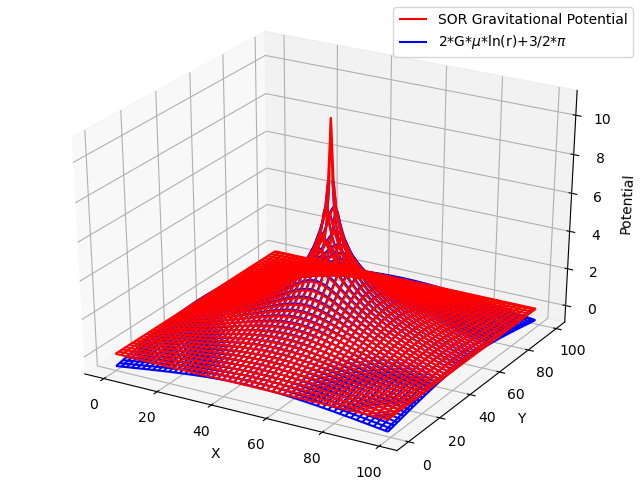

In [1]:
# Creates the interactive graph
%matplotlib notebook


""" From "COMPUTATIONAL PHYSICS", 3rd Ed, Enlarged Python eTextBook  
    by RH Landau, MJ Paez, and CC Bordeianu
    Copyright Wiley-VCH Verlag GmbH & Co. KGaA, Berlin;  Copyright R Landau,
    Oregon State Unv, MJ Paez, Univ Antioquia, C Bordeianu, Univ Bucharest, 2015.
    Support by National Science Foundation"""
   
# LaplaceLine.py:  Solve Laplace's eqtn, 3D matplot, close shell to quit


import matplotlib.pylab as p
from mpl_toolkits.mplot3d import Axes3D
from numpy import *;
import numpy;
print("Initializing")
omega=1.8
Nmax = 100; Niter = 3000; V = zeros((Nmax, Nmax), float)   

# Setup the density matrix
rho = zeros((Nmax, Nmax), float)
rho[int(Nmax/2), int(Nmax/2)]=1.

h=1

for iter in range(Niter):                                  
    if iter%10 == 0: print(iter)
    maxerr=0.
    for i in range(1, Nmax-1):                                                
        for j in range(1,Nmax-1):
            # Added the np.pi*h*h*rho[i,j] to the end to account for the mass
            du = 1/4*(V[i+1,j]+V[i-1,j]+V[i,j+1]+V[i,j-1])-V[i,j] + pi*h*h*rho[i,j]
            if(maxerr<abs(du)):
                maxerr=abs(du)
                
            V[i,j] = V[i,j] + omega*du
    print(maxerr)
    if(maxerr<1.e-3):
        break
            
x = range(0, Nmax, 1)
y = range(0, Nmax, 1)                              
X, Y = p.meshgrid(x,y)                 

def functz(V):                                         # V(x, y) 
    z = V[X,Y]                        
    return z

def log_curve(x, y, mu):
    r = sqrt((x-50.)*(x-50.)+(y-50.)*(y-50.))
    return -2*mu*log(r)+2.5*pi

Z = functz(V)
Z1 = log_curve(X,Y, rho[50,50])

fig = p.figure()                                      # Create figure
ax = Axes3D(fig)                                      # Plot axes
ax.plot_wireframe(X, Y, Z, color = 'r')               # Red wireframe
ax.plot_wireframe(X, Y, Z1, color = 'b')              # Blue wireframe
ax.legend(["SOR Gravitational Potential", "2*G*$\mu$*ln(r)+3/2*$\pi$"])
ax.set_xlabel('X')                                     
ax.set_ylabel('Y')
ax.set_zlabel('Potential')
p.show()                                              # Show fig